In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('data/fbpac-ads-en-US-cleaned.csv')
df.head()

,id,political,not_political,title,message,created_at,updated_at,impressions,political_probability,advertiser,...,18-34,35-49,50-64,65+,Created_At_Year,Created_At_Month,Updated_At_Year,Updated_At_Month,political_probability_int,fundraising_proba_int
0,0,0,0,League of Conservation Voters,BREAKING: Trump’s Department of the Interior p...,2019-03-27 16:52:25.625455+00,2019-03-27 16:52:25.625455+00,1,0.999992,NaN,...,1,1,1,1,2019,3,2019,3,8,5.0
1,1,0,0,Indivisible Guide,The Mueller investigation is over. Special Cou...,2019-03-27 17:28:14.096849+00,2019-03-27 17:28:14.096849+00,1,0.999997,NaN,...,1,1,1,1,2019,3,2019,3,8,2.0
2,2,0,0,International Rescue Committee,Zimbabwe is reeling from the impact of Cyclone...,2019-03-27 17:38:23.101377+00,2019-03-27 17:38:23.101377+00,1,0.977570,NaN,...,1,1,1,1,2019,3,2019,3,8,8.0
3,3,0,0,Covenant House International,What more can you do in the final hours of 201...,2018-12-30 20:59:13.879124+00,2018-12-30 20:59:13.879124+00,1,0.360711,Covenant House International,...,1,1,1,1,2018,12,2018,12,2,NaN
4,4,0,1,Planned Parenthood,"Say it loud, say it proud: Our rights, our hea...",2019-03-27 17:18:29.764002+00,2019-04-11 15:02:58.081112+00,1,0.999998,NaN,...,1,1,1,1,2019,3,2019,4,8,8.0


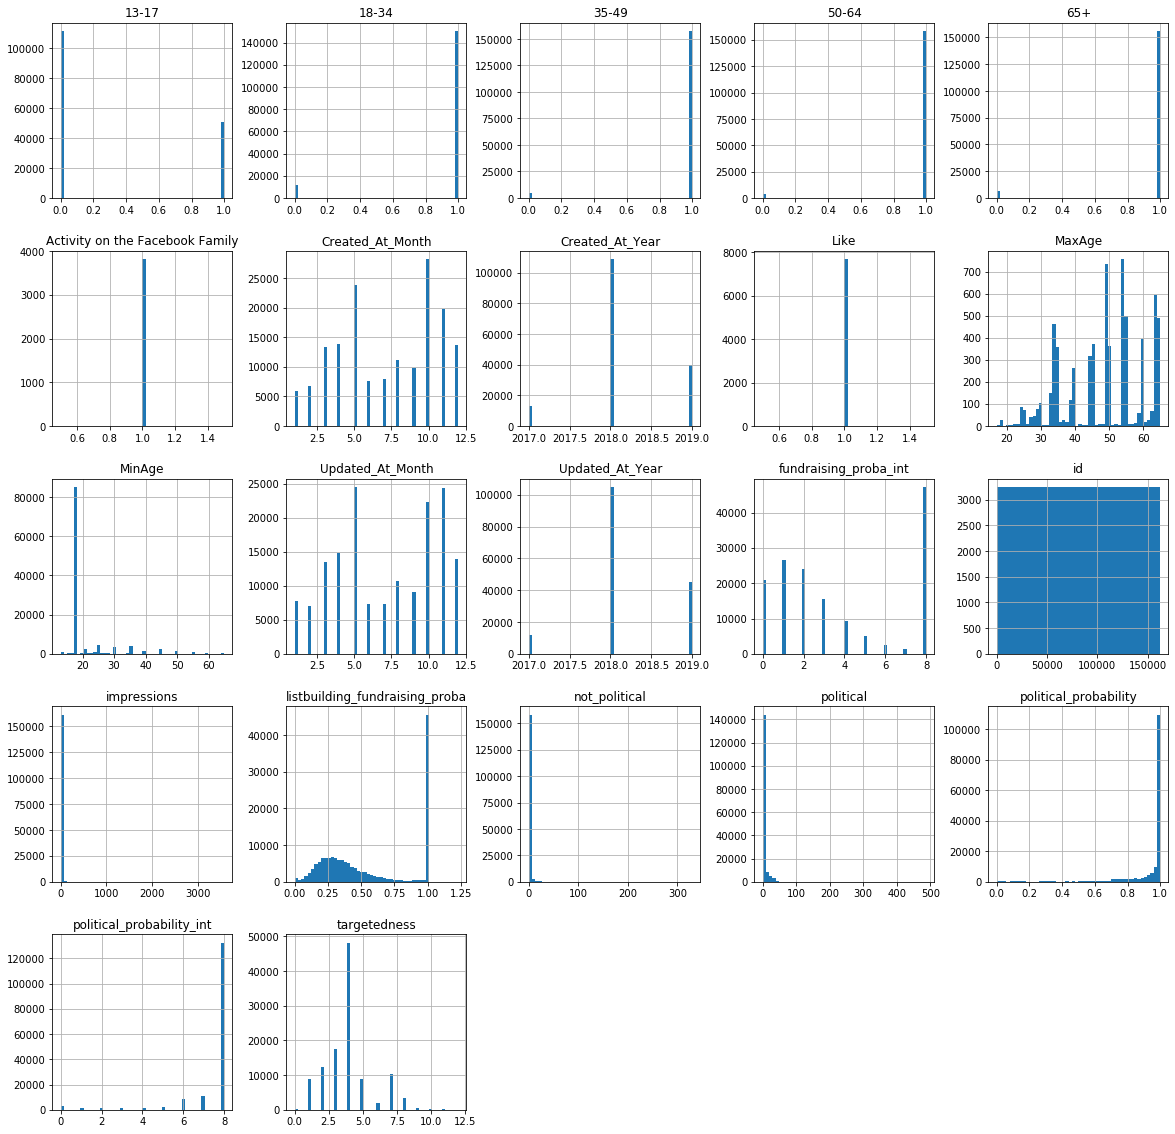

In [5]:
df.hist(bins=50, figsize=(20, 20))
plt.show()

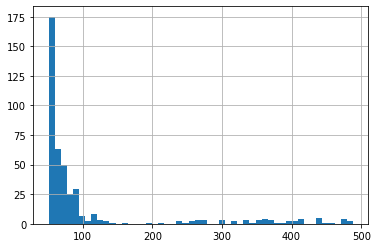

In [12]:
df['political'][df['political'] > 50].hist(bins=50)
plt.show()

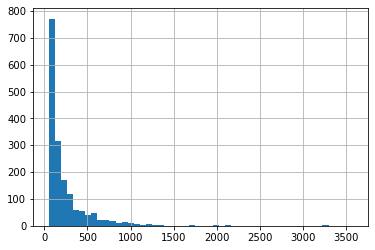

In [15]:
df['impressions'][df['impressions'] > 50].hist(bins=50)
plt.show()

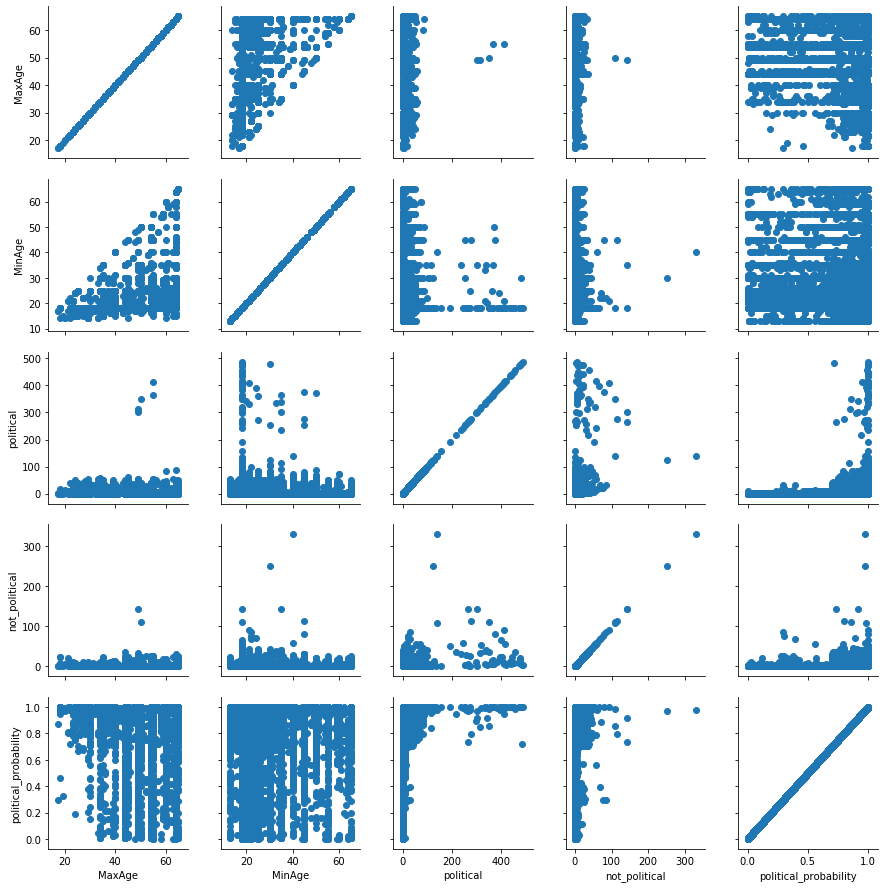

In [37]:
g = sns.PairGrid(df[['MaxAge', 'MinAge', 'political', 'not_political', 'political_probability']])
g = g.map(plt.scatter)

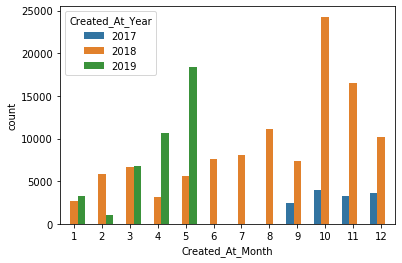

In [40]:
sns.countplot(x='Created_At_Month', data=df, hue='Created_At_Year')
plt.show()

In [104]:
import collections
import re

text_list = [message for message in df['message'] if not pd.isna(message)]

len(text_list)

162311

In [105]:
text = ' '.join(text_list)
text = text.replace('bit', '') \
           .replace('ly', '') \
           .replace('gt', '')
len(text)

49097967

In [61]:
word_count = collections.defaultdict(int)
pattern = r'\W'

for word in text.lower().split():
    word = re.sub(pattern, '' , word).strip()
    if len(word) > 2 and word not in ignore_words:
        word_count[word] += 1

mc = sorted(word_count.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

In [62]:
for word, count in mc:
    print(word, ':', count)

now : 40304
help : 39307
need : 32370
more : 28702
all : 27549
today : 27484
people : 25923
make : 24683
their : 23393
were : 22724
vote : 22225
just : 21476
trump : 21474
who : 21370
support : 20138
out : 19768
time : 19568
they : 19369
like : 19246
campaign : 18132


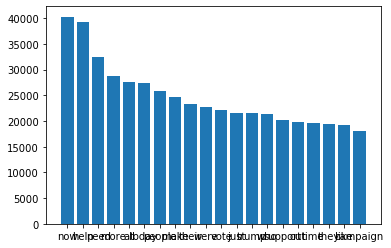

In [67]:
mc = dict(mc)
names = list(mc.keys())
values = list(mc.values())

plt.bar(range(len(mc)), values, tick_label=names)
plt.show()

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white',
               width=600,
               height=600,
               max_words=2000).generate(text)

plt.figure(figsize=(600, 600))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [107]:
for message in df['message']:
    if pd.isna(message):
        continue
    if 'Add' in message:
        print(message)

The Mueller investigation is over. Special Counsel Robert Mueller has delivered his findings to Attorney General Barr, and now Barr must disclose those findings to Congress. Indivisible is demanding that these findings be made public, and we fully support the congressional investigations that are still pending. If you agree, join Indivisible today and urge Congress to release the report. Add your name to the growing list of Americans who are demanding full transparency and accountability in this matter.
We are facing a funding crisis in our schools, and Governor Abbott is handing out tax breaks to his special interest donors. Will you join my call to demand Governor Abbott close his special interest tax loopholes? Add your name to my petition here.
BREAKING: Republican Scott Wagner said he would support legislation to ban abortion as early as SIX weeks into a pregnancy -- before most women even know they are pregnant. Add your name to STOP the Republican six week abortion ban:
It's tim

Every American has a fundamental right to clean soil, clean water, and clean air. That’s why I’m proud to have introduced The Environmental Justice Act of 2017 in the Senate.  And I want you to become a Citizen Co-Sponsor to help pass this crucial bill that will protect the environment for vulnerable communities. Add your name today to fight environmental injustice!
When someone you love is sick, you'll do anything to help them get better. But too often, drug corporations price lifesaving medications out of reach for too many people. It's time to stop price gouging – and put people first. Add your name today to tell Congress: Put people's health before drug corporation profits!
BREAKING: Trump's administration just dealt women a devastating blow by rolling back Obamacare's promise of copay-free birth control. We're fighting back, but we need 157 additional signatures by midnight to reach our goal of 50,000 people standing up for contraceptive coverage. Add your name to tell Trump: Stop

Congress must take action now to dramatically limit Trump’s ability to fire special counsel Robert Mueller. Time to stop stalling. Add your name if you agree that we need Congress to pass legislation to protect this investigation.
The Colorado Blueprint to End Hunger is working hard to make sure no Coloradans go hungry. Add your name to join us in the fight to guarantee food security to all Coloradans! #endhugerco
After Kavanaugh's nomination debacle, it is clear that today's Senate rules are creating lasting damage to the Supreme Court.  I'm fighting to restore the 60 vote rule to help bring bipartisanship back to Washington. Add your name to help me.
One thing keeping us from accessing safe, effective abortion pills online: anti-choice politicians. Add your name if you believe we should be able to manage an abortion on our own terms, without the interference of politicians!
It’s time to take our power back. Add your name to fight back against restrictions on abortion access!
Special 